<a href="https://colab.research.google.com/github/MartinGalvao/DataScience/blob/main/PRUEBAS_Entregable_1_Martin_Galvao_DataScience_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 👨🏻‍⚕Prediccion Hipertension, Derrame cerebral y Enfermedades cardiacas👨🏻‍⚕ </b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family:

*   Elemento de la lista
*   Elemento de la lista

Georgia;">
    <span style="color: #008080;"> Autor :</span>
    <span style="color: black;"> Martin Galvao 📄🖋️</span>
</h3>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 👋🏻 Introduccion 👋🏻 </b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   

<h3 align="left"><font color=cyan>📝 Objetivo del Proyecto 📝 </font></h3><br>
    
1.
Desarrollar un  <b>modelo predictivo </b> utilizando algoritmos de aprendizaje automático para evaluar y <b>predecir con precisión las distintas enfermedades </b> en funcion de las diversas condiciones de cada paciente.<br>

2. Evaluar y <b> comparar el rendimiento de diferentes técnicas de aprendizaje automático </b> para determinar el enfoque más eficaz para la predicción de las distintas enfermedades proporcionando información para posibles aplicaciones en el area de salud.<br>
    

    
    

    
    

<h3 align="left"><font color=cyan> 👨🏼‍💼 Comprensión empresarial 👨🏼‍💼  </font></h3><br>
    
1. <b> Calidad de la salud del paciente </b> La prediccion precisa de las enfermedades de cada paciente, conducira a realizar un proceso para mejorar su salud y evitar estas mismas. <br>
    
2. <b>Cost Optimization:</b> Optimal resource allocation and reduced wastage through predictive modeling will result in cost savings for wineries, improving overall operational efficiency.<br>

3. <b>Market Competitiveness:</b> Consistent production of high-quality red wines will give wineries a competitive advantage, allowing them to stand out in the market and attract more customers.<br>
    </div>
    </div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Import Librerias 📚</b></div>

In [124]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import xgboost as xgb

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Carga Dataset ⏳</b></div>

In [125]:
df = pd.read_csv("https://raw.githubusercontent.com/MartinGalvao/DataScience/main/healthcare-dataset-stroke-data.csv")

In [126]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Comprension basica de los datos 🧠</b></div>

### 1. Observar la dimension del Dataset

In [127]:
df.shape

(5110, 12)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Hay un total de **5110 Registros/Filas** en el dataset.
* Hay un total de **12 Funciones/Columnas** en el dataset.


### 2. Generación de Información Básica sobre Datos.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [129]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Columns: 12 entries, id to stroke
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Hay **float64(3)** en el dataset.
* Hay **int 64(4)** en el dataset.
* Hay **object(5)** en el dataset.

### 3. Modificacion de nombre de columnas.

In [130]:
#Modificacion Nombre de Columnas
df = df.rename(columns={'heart_disease': 'Enfermedades Cardiacas'})
df = df.rename(columns={'hypertension': 'Hipertensión'})
df = df.rename(columns={'avg_glucose_level': 'Nivel Promedio de Glucosa en Sangre'})
df = df.rename(columns={'bmi': 'Indice de Masa Corporal'})
df = df.rename(columns={'stroke': 'Derrame Cerebral'})
df = df.rename(columns={'smoking_status': 'Estado de Fumador'})
df = df.rename(columns={'gender': 'Genero'})
df = df.rename(columns={'age': 'Edad'})
df = df.rename(columns={'ever_married': 'Casado'})
df = df.rename(columns={'work_type': 'Tipo de Trabajo'})
df = df.rename(columns={'Residence_type': 'Tipo de Residencia'})

In [131]:
df.head(10)

,id,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Casado,Tipo de Trabajo,Tipo de Residencia,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se cambiaron el nombre de las columnas de **Ingles a Español**.

### 4. Modificacion de los nombres de los valores.

In [132]:
#Modificacion de valores (Se cambio de ingles a español)
df['Genero'] = df['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otro'
})
df ['Estado de Fumador'] = df['Estado de Fumador'].replace({
    'formerly smoked': 'Anteriormente fumador',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fumador',
    'Unknown': 'Desconocido'
})
df ["Tipo de Trabajo"] = df["Tipo de Trabajo"].replace({
    'Private': 'Privado',
    'Self-employed': 'Empresario',
    'children': 'Niños',
    'Govt_job': 'Gobierno',
    'Never_worked': 'Nunca trabajo'
})
df ["Tipo de Residencia"] = df["Tipo de Residencia"].replace({
    'Urban': 'Urbano',
    'Rural': 'Rural'
})
df ["Casado"] = df["Casado"].replace({
    'Yes': 'Si',
    'No': 'No'
})

In [133]:
df.head(10)

,id,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Casado,Tipo de Trabajo,Tipo de Residencia,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,9046,Masculino,67.0,0,1,Si,Privado,Urbano,228.69,36.6,Anteriormente fumador,1
1,51676,Femenino,61.0,0,0,Si,Empresario,Rural,202.21,NaN,Nunca fumó,1
2,31112,Masculino,80.0,0,1,Si,Privado,Rural,105.92,32.5,Nunca fumó,1
3,60182,Femenino,49.0,0,0,Si,Privado,Urbano,171.23,34.4,Fumador,1
4,1665,Femenino,79.0,1,0,Si,Empresario,Rural,174.12,24.0,Nunca fumó,1
5,56669,Masculino,81.0,0,0,Si,Privado,Urbano,186.21,29.0,Anteriormente fumador,1
6,53882,Masculino,74.0,1,1,Si,Privado,Rural,70.09,27.4,Nunca fumó,1
7,10434,Femenino,69.0,0,0,No,Privado,Urbano,94.39,22.8,Nunca fumó,1
8,27419,Femenino,59.0,0,0,Si,Privado,Rural,76.15,NaN,Desconocido,1
9,60491,Femenino,78.0,0,0,Si,Privado,Urbano,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se cambiaron los nombres de los valores  de **Ingles a Español**.

### 5. Eliminacion de columnas insignificantes.

In [134]:
#Elimino las columnas insignificantes
df = df.drop(columns='id')
df = df.drop(columns='Casado')
df = df.drop(columns='Tipo de Trabajo')
df = df.drop(columns="Tipo de Residencia")
df.shape

(5110, 8)

In [135]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,NaN,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,NaN,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se eliminaron columnas insignificantes que no **generan un cambio a mi analisis**.

### 6. Busqueda de valores perdidos.

In [136]:
null_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing values"] = round(100*null_df["Total No. of Missing Values"]/len(df),2)
null_df.sort_values(by="% of Missing values",ascending=False)

,Total No. of Missing Values,% of Missing values
Indice de Masa Corporal,201,3.93
Genero,0,0.00
Edad,0,0.00
Hipertensión,0,0.00
Enfermedades Cardiacas,0,0.00
Nivel Promedio de Glucosa en Sangre,0,0.00
Estado de Fumador,0,0.00
Derrame Cerebral,0,0.00


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* A ninguna de las columnas le **faltan valores**.
* Por tanto, podemos decir que **el conjunto de datos será más fiable para predecir**.

### 7. Busqueda y remplazo de datos nulos.

In [137]:
#Busco los datos nulos
df.isnull().sum()

,0
Genero,0
Edad,0
Hipertensión,0
Enfermedades Cardiacas,0
Nivel Promedio de Glucosa en Sangre,0
Indice de Masa Corporal,201
Estado de Fumador,0
Derrame Cerebral,0


In [138]:
# Reemplazo los valores NaN en la columna 'Indice de Masa Corporal' con la mediana
df['Indice de Masa Corporal'] = df['Indice de Masa Corporal'].fillna(df['Indice de Masa Corporal'].median())

In [139]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,28.1,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,28.1,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se reemplazaron los valores nulos de la columna Indice de Masa Corporal **por la mediana**.

### 8. Busqueda de valores duplicados.

In [140]:
print("Is there any Duplicate Records => ",df.duplicated().any())
print("-"*42)
print("Total Duplicate Records present is =>",df[df.duplicated()==True].shape[0])

Is there any Duplicate Records =>  False
------------------------------------------
Total Duplicate Records present is => 0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* No se encontraron **valores duplicados**.


### 9. Realización de análisis estadístico descriptivo de características numéricas.

In [141]:
df.describe().T.style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
Edad,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
Hipertensión,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
Enfermedades Cardiacas,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
Nivel Promedio de Glucosa en Sangre,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
Indice de Masa Corporal,5110.000000,28.862035,7.699562,10.300000,23.800000,28.100000,32.800000,97.600000
Derrame Cerebral,5110.000000,0.048728,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* La media de la Hipertension es de **0.097**.
* La media de las Enfermedades Cardiacas es de **0.054**.
* La media de los Derrames Cerebrales es de **0.048**.




### 10. Descripcion de mi dataset.

In [142]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,28.1,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,28.1,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

*   **Genero:** Muestra si las personas son Hombres o Mujeres.
*   **Edad:**  Muestra la edad de las personas.
*   **Hipertension:** Muestra 0 si las personas no tienen hipertension y 1 si tienen hipertension.
*   **Enfermedades Cardiacas:** Muestra 0 si las personas no tienen enfermedades cardicacas y 1 si tienen enfermedades cardiacas.
*   **Nivel Promedio de Glucosa en Sangre:** Muestra el promedio de glucosa de las personas.
*  **Indice de Masa Corporal:** Muestra el promedio de masa corporal de las personas.
*   **Estado de Fumador:** Muestra el estado del fumador
*   **Derrame Cerebral:** Muestra 0 si las personas no tienen derrames cerebrales y 1 si tienen derrames cerebrales.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> ❌ Manipulacion de Outliers ❌ </b></div>

### 1. Se eliminaron los Outliers Dataset.

In [143]:


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df_filtered = remove_outliers_iqr(df, 'Indice de Masa Corporal')
df_filtered = remove_outliers_iqr(df_filtered, 'Nivel Promedio de Glucosa en Sangre')


def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_replaced = df.copy()
df_replaced = replace_outliers_iqr(df_replaced, 'Indice de Masa Corporal')
df_replaced = replace_outliers_iqr(df_replaced, 'Nivel Promedio de Glucosa en Sangre')



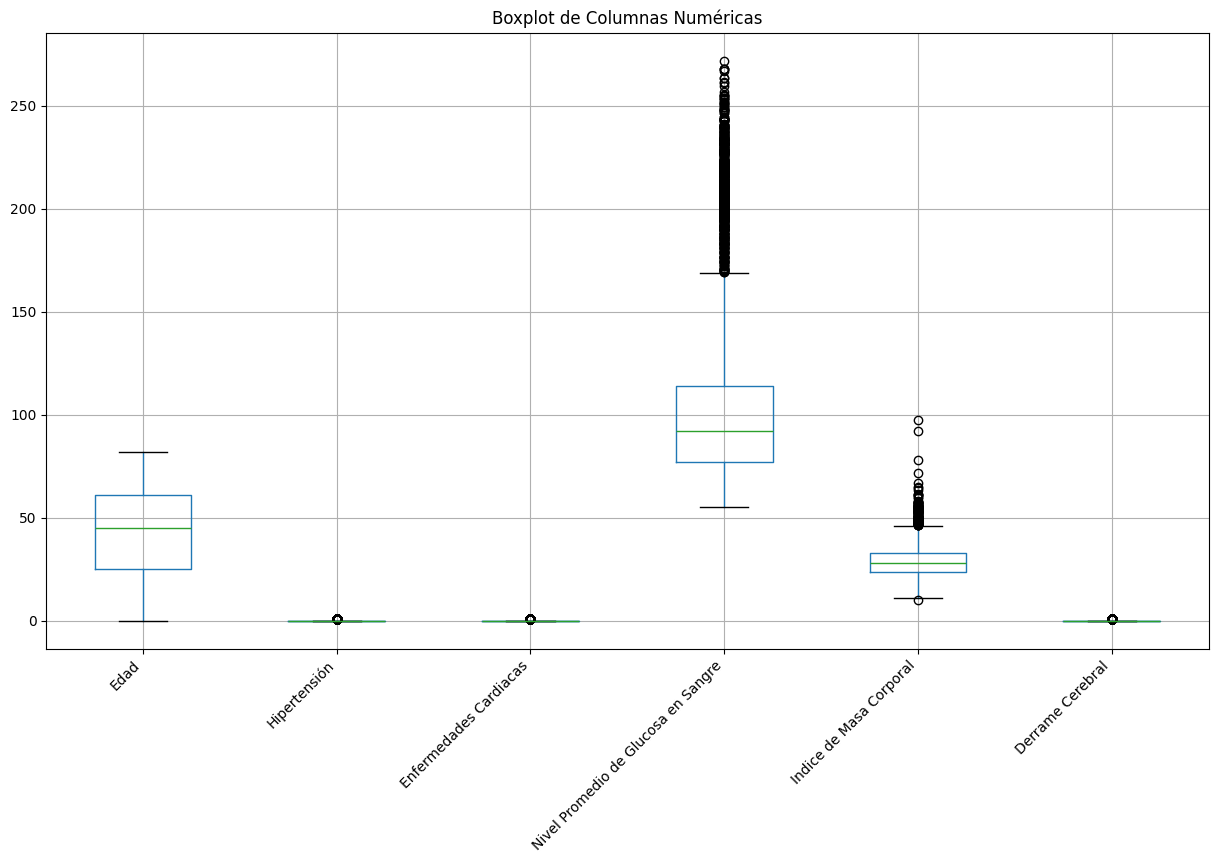

In [144]:
# Se seleccionaron solo las columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Se creo el gráfico de boxplot
plt.figure(figsize=(15, 8))
df.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de Columnas Numéricas')
plt.show()

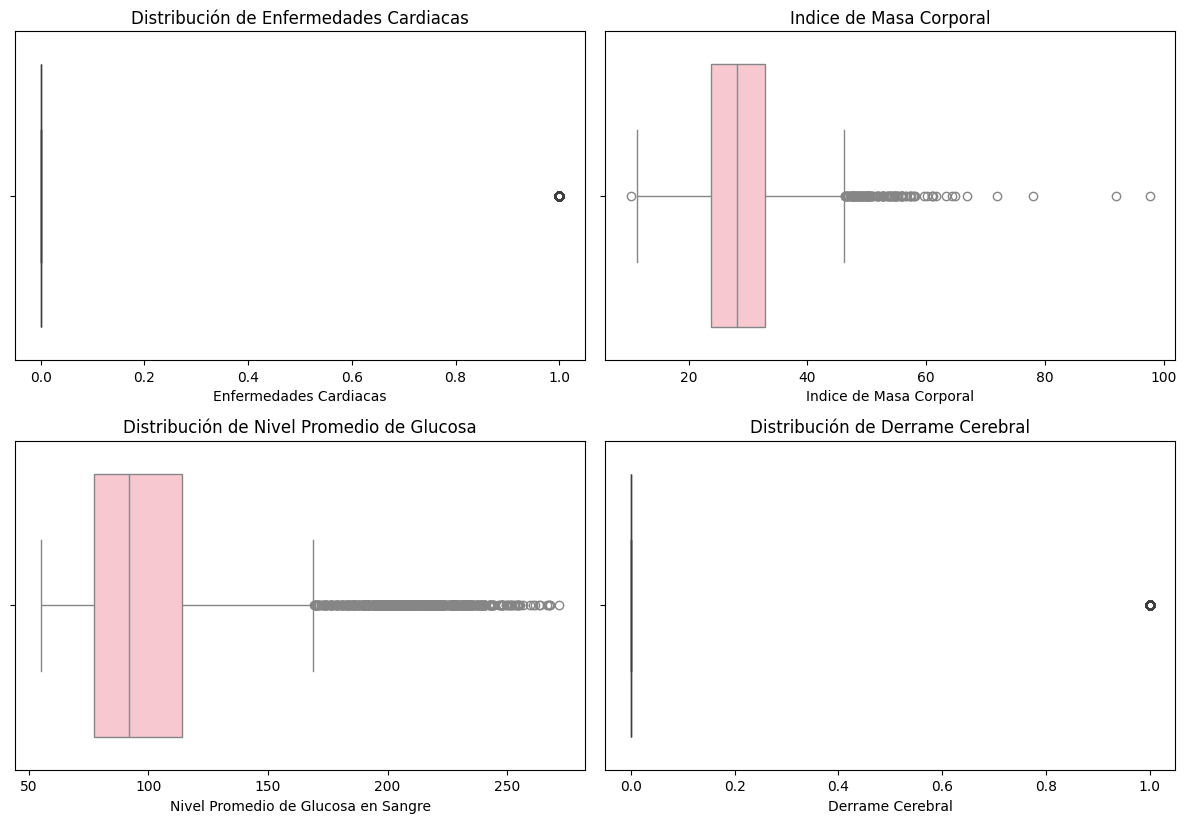

In [145]:

# Se creo una cuadrícula 3x2 para los subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Boxplot para Enfermedades Cardiacas
sns.boxplot(x=df['Enfermedades Cardiacas'], ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Enfermedades Cardiacas')


# Boxplot para BMI
sns.boxplot(x=df['Indice de Masa Corporal'], ax=axes[0, 1], color = "pink")
axes[0, 1].set_title('Indice de Masa Corporal')
color = "ligthred"

# Boxplot para Nivel Promedio de Glucosa en Sangre
sns.boxplot(x=df['Nivel Promedio de Glucosa en Sangre'], ax=axes[1, 0], color = "pink")
axes[1, 0].set_title('Distribución de Nivel Promedio de Glucosa')

# Boxplot para Derrame Cerebral
sns.boxplot(x=df['Derrame Cerebral'], ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Derrame Cerebral')




# Se elimino los subplots vacíos
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])

# Se ajusto el diseño
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* En estos graficos se puede ver la eliminacion de los outliers.
* Se eliminaron los outliers para mejorar los modelos.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis (EDA)📊</b></div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Para iniciar es importante conocer la cantidad de pacientes que tenemos. </div>

In [146]:


print(f"Numero total de pacientes: {len(df)}")

Numero total de pacientes: 5110


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1. Visualizacion "Variable Objetivo" (Derrame Cerebral). </div>

In [147]:
#Determinacion de la variable target
target_variable = 'Derrame Cerebral'
print(f"La variable Objetivo es: {target_variable}")

La variable Objetivo es: Derrame Cerebral


<ipython-input-148-7be31259518c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[target_variable], palette=colors)


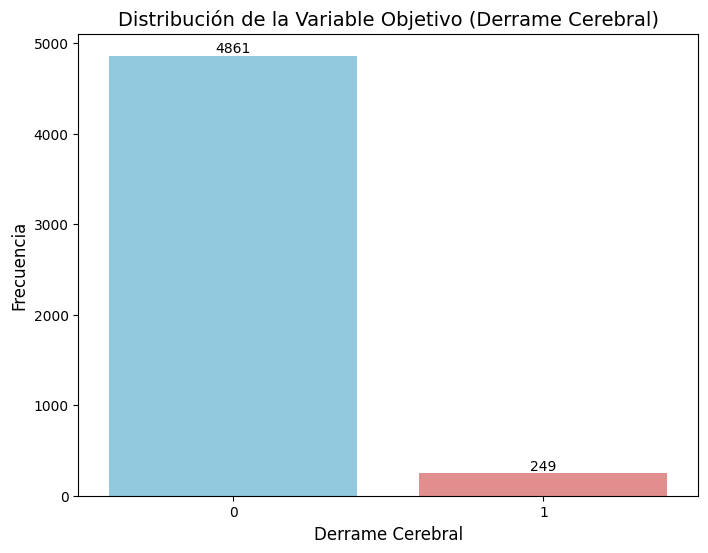

Podemos observar la frecuencia de ocurrencia de nuestra variable objetivo (Derrame Cerebral)


In [148]:

# Visualización de la "Variable objetivo"



plt.figure(figsize=(8, 6))
colors = ["skyblue", "lightcoral"]
ax = sns.countplot(x=df[target_variable], palette=colors)
plt.title(f'Distribución de la Variable Objetivo ({target_variable})', fontsize=14)
plt.xlabel(target_variable, fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()
print("Podemos observar la frecuencia de ocurrencia de nuestra variable objetivo (Derrame Cerebral)")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Derrame Cerebral**.
* 249 Pacientes tuvieron **Derrames Cerebrales** y 4861 no tuvieron **Derrames Cerebrales**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2. Visualizacion "Enfermedades Cardiacas" Atributo. </div>

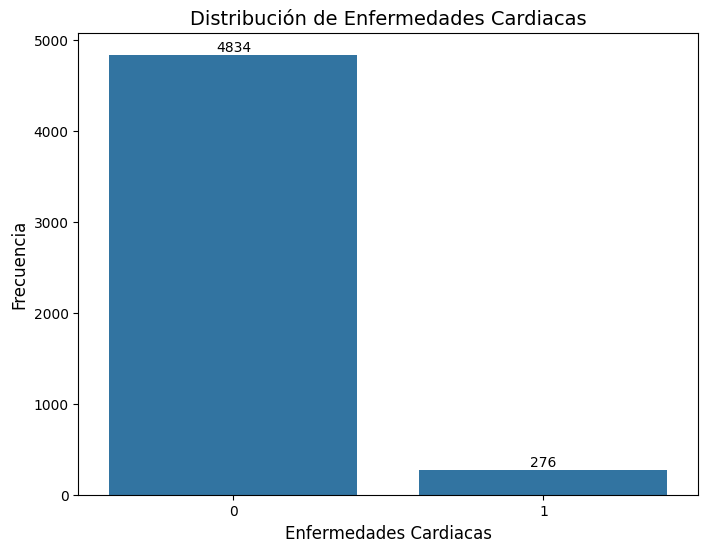

Podemos observar la frecuencia de ocurrencia de la variable 'Enfermedades Cardiacas'


In [149]:


# Visualización de la variable "Enfermedades Cardiacas"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Enfermedades Cardiacas'])
plt.title('Distribución de Enfermedades Cardiacas', fontsize=14)
plt.xlabel('Enfermedades Cardiacas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()
print("Podemos observar la frecuencia de ocurrencia de la variable 'Enfermedades Cardiacas'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Enfermedades Cardiacas**.
* 276 Pacientes tuvieron **Enfermedades Cardiacas** y 4834 no tuvieron **Enfermedades Cardiacas**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 3. Visualizacion "Hipertension" Atributo. </div>


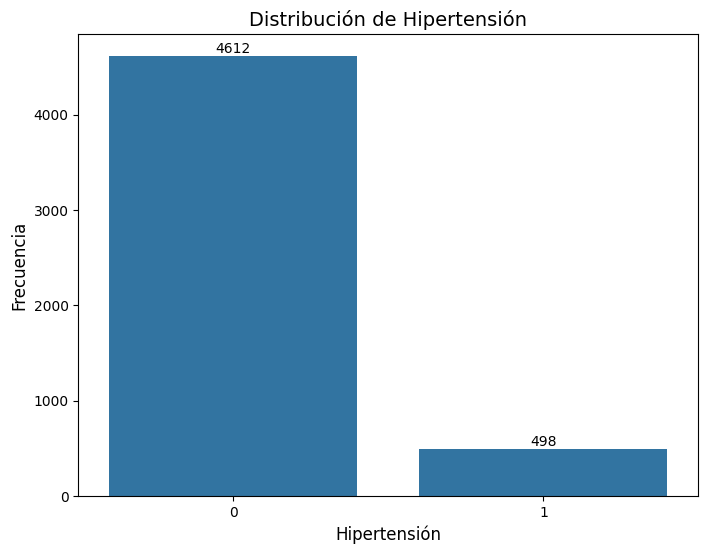

Podemos observar la frecuencia de ocurrencia de la variable 'Hipertensión'


In [150]:

# Visualización de la variable "Hipertensión"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Hipertensión'])
plt.title('Distribución de Hipertensión', fontsize=14)
plt.xlabel('Hipertensión', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Hipertensión'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Hipertensión**.
* 498 Pacientes tuvieron **Hipertensión** y 4612 no tuvieron **Hipertensión**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 4. Visualizacion "Nivel Promedio de Glucosa en Sangre" Atributo. </div>

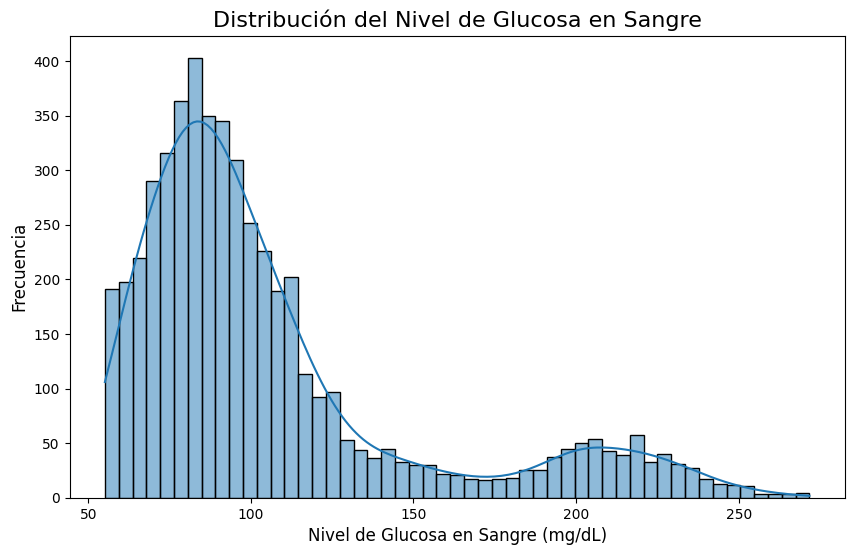

La media del nivel de glucosa en sangre es: 106.15 mg/dL


In [151]:


# Visualización del nivel de glucosa en sangre
plt.figure(figsize=(10, 6))
sns.histplot(df['Nivel Promedio de Glucosa en Sangre'], kde=True)
plt.title('Distribución del Nivel de Glucosa en Sangre', fontsize=16)
plt.xlabel('Nivel de Glucosa en Sangre (mg/dL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Cálculo de la media del nivel de glucosa en sangre
media_glucosa = df['Nivel Promedio de Glucosa en Sangre'].mean()
print(f'La media del nivel de glucosa en sangre es: {media_glucosa:.2f} mg/dL')

In [152]:


# Calcula el número de pacientes con un nivel promedio de glucosa en sangre alto
# Consideramos "alto" como superior a la media
media_glucosa = df['Nivel Promedio de Glucosa en Sangre'].mean()
pacientes_glucosa_alta = len(df[df['Nivel Promedio de Glucosa en Sangre'] > media_glucosa])

print(f"Hay {pacientes_glucosa_alta} pacientes con un nivel promedio de glucosa en sangre superior a la media ({media_glucosa:.2f})mg/dL.")

Hay 1644 pacientes con un nivel promedio de glucosa en sangre superior a la media (106.15)mg/dL.


In [153]:


# Calcula el número de pacientes con un nivel promedio de glucosa en sangre bajo
# Consideramos "bajo" como inferior a la media
pacientes_glucosa_baja = len(df[df['Nivel Promedio de Glucosa en Sangre'] < media_glucosa])

print(f"Hay {pacientes_glucosa_baja} pacientes con un nivel promedio de glucosa en sangre inferior a la media ({media_glucosa:.2f})mg/dL.")

Hay 3466 pacientes con un nivel promedio de glucosa en sangre inferior a la media (106.15)mg/dL.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Nivel Promedio de Glucosa en Sangre**.
* La media de **Nivel Promedio de Glucosa en Sangre** es de **(106.15)mg/dL**. Hay 1644 pacientes con un **nivel promedio de glucosa en sangre superior a la media (106.15)mg/dL** y 3466 pacientes con un **nivel promedio de glucosa en sangre inferior a la media (106.15)mg/dL**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 5. Visualizacion "Indice masa corporal" Atributo. </div>

La media del IMC es: 28.86 


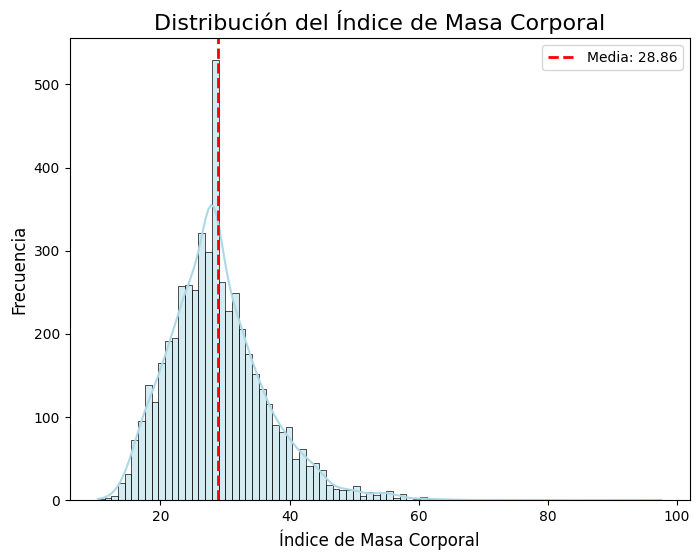

In [154]:

# Calcula la media del índice de masa corporal
media_imc = df['Indice de Masa Corporal'].mean()
print(f'La media del IMC es: {media_imc:.2f} ')

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.histplot(df['Indice de Masa Corporal'], kde=True, color="lightblue")
plt.axvline(media_imc, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_imc:.2f}')
plt.title('Distribución del Índice de Masa Corporal', fontsize=16)
plt.xlabel('Índice de Masa Corporal', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()





In [155]:


# Calcula el número de pacientes con un IMC alto
# Consideramos "alto" como superior a la media
media_imc = df['Indice de Masa Corporal'].mean()
pacientes_imc_alto = len(df[df['Indice de Masa Corporal'] > media_imc])

print(f"Hay {pacientes_imc_alto} pacientes con un IMC superior a la media ({media_imc:.2f})")

Hay 2212 pacientes con un IMC superior a la media (28.86)


In [156]:

# Calcula el número de pacientes con un IMC bajo
# Consideramos "bajo" como inferior a la media
media_imc = df['Indice de Masa Corporal'].mean()
pacientes_imc_bajo = len(df[df['Indice de Masa Corporal'] < media_imc])

print(f"Hay {pacientes_imc_bajo} pacientes con un IMC bajo inferior a la media de ({media_imc:.2f})")

Hay 2898 pacientes con un IMC bajo inferior a la media de (28.86)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **IMC**.
* La media de **IMC** es de (28.86). Hay 2212 pacientes con un **IMC superior a la media (28.86)** y 2898 pacientes con un **IMC inferior a la media (28.86)**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 6. Visualizacion "Edad" Atributo. </div>

La media de edad es: 43.23 


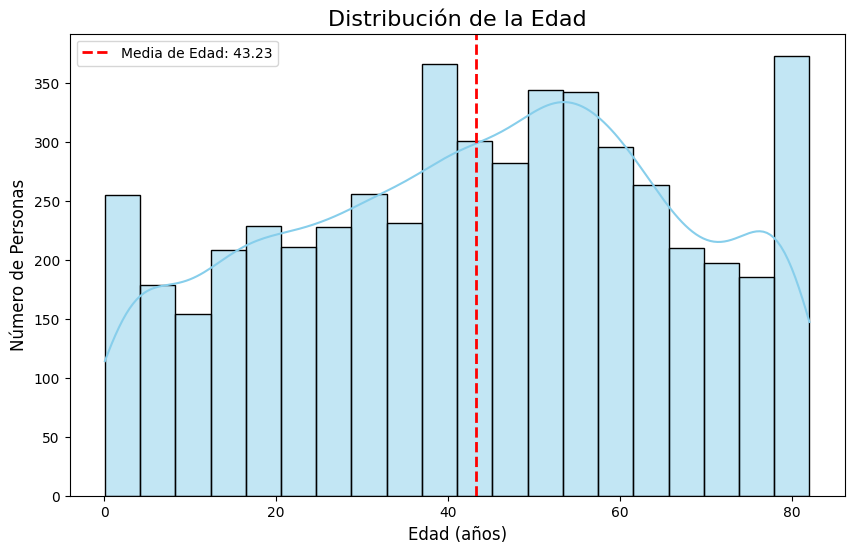

In [157]:
# Calcula la media de edad
media_edad = df['Edad'].mean()
print(f'La media de edad es: {media_edad:.2f} ')

# Crea el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True, color='skyblue')
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=2, label=f'Media de Edad: {media_edad:.2f}')
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.legend()
plt.show()



In [158]:


# Calcula la cantidad de personas con edad superior a la media
personas_edad_superior_media = len(df[df['Edad'] > media_edad])

print(f"Hay {personas_edad_superior_media} pacientes con una edad superior a la media ({media_edad:.2f} años).")

Hay 2652 pacientes con una edad superior a la media (43.23 años).


In [159]:


# Calcula la cantidad de personas con edad inferior a la media
personas_edad_inferior_media = len(df[df['Edad'] < media_edad])

print(f"Hay {personas_edad_inferior_media} pacientes con una edad inferior a la media ({media_edad:.2f} años).")

Hay 2458 pacientes con una edad inferior a la media (43.23 años).


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Edad**.
* La media de **Edad** es de **(43.23)años**. Hay 2652 pacientes con una **Edad superior a la media (43.23)años** y 2458 pacientes con una **Edad inferior a la media (43.23)años**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 7. Visualizacion "Genero" Atributo. </div>

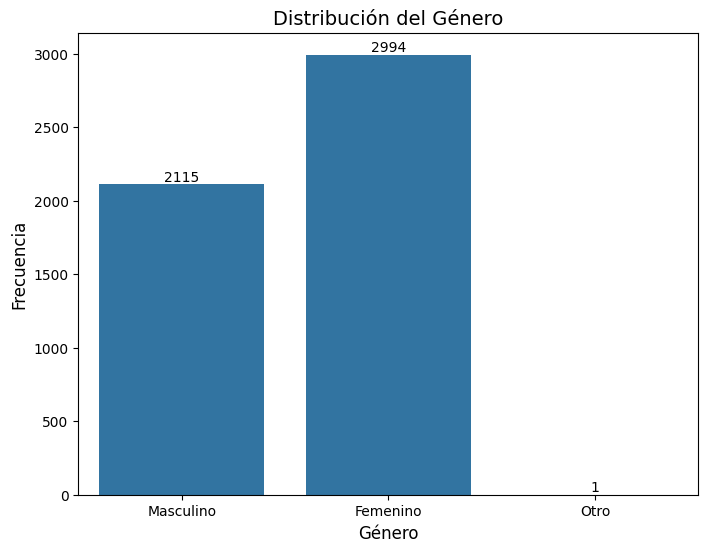

Podemos observar la frecuencia de ocurrencia de la variable 'Género'


In [160]:

# Visualización de la variable "Género"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Genero'])
plt.title('Distribución del Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Género'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Genero**.
* 2115 Pacientes son **Masculinos** , 2994 pacientes son **Femeninos** y 1 paciente es de **otro genero**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 8. Visualizacion "Estado Fumador" Atributo. </div>

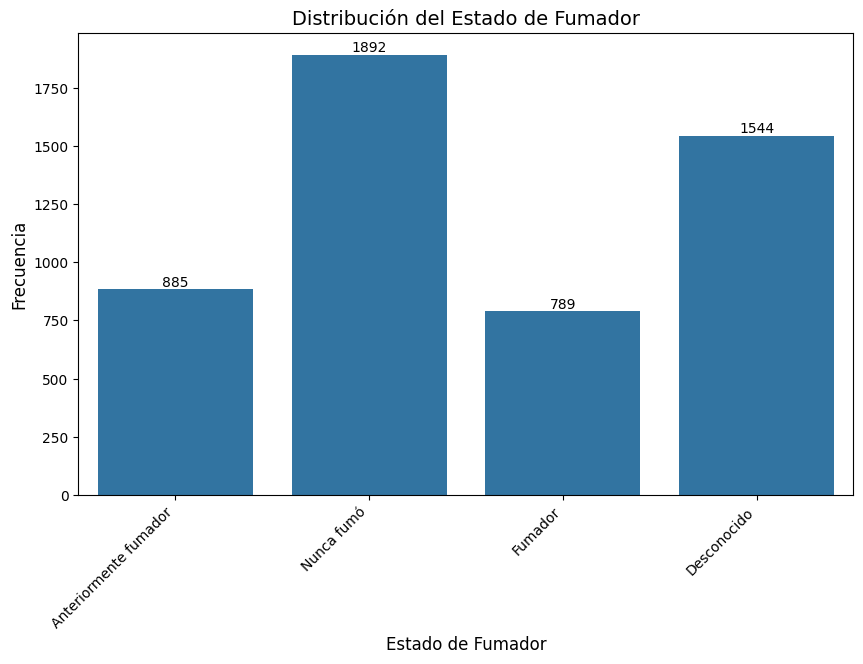

Podemos observar la frecuencia de ocurrencia de la variable 'Estado de Fumador'


In [161]:


# Visualización de la variable "Estado de Fumador"


plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['Estado de Fumador'])
plt.title('Distribución del Estado de Fumador', fontsize=14)
plt.xlabel('Estado de Fumador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Estado de Fumador'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Estado de Fumador**.
* 885 Pacientes son **Anteriormente Fumador** , 1894 pacientes **Nunca Fumaron** ,  789 pacientes son **Fumadores** y 1554 pacientes **No se conoce**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hipotesis❓</b></div>

En este apartado se van a mostrar varias hipotesis para analizar.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Con respecto a la predicción de accidentes cerebrovasculares </div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1.Hipotesis Edad y Riesgo de Accidente Cerebrovascular. </div>

Se buscara analizar los atributos de Edad y Derrame Cerebral.

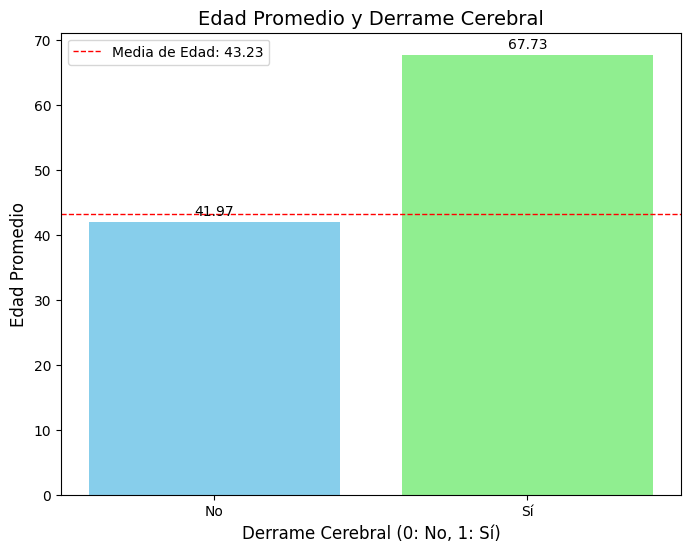

Pacientes con derrame cerebral mayores a la media de edad (43.23): 239
Pacientes con derrame cerebral menores o iguales a la media de edad (43.23): 10


In [162]:


# Crea un nuevo DataFrame con la información necesaria para el gráfico
stroke_by_age = df.groupby('Derrame Cerebral')['Edad'].mean().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(stroke_by_age['Derrame Cerebral'], stroke_by_age['Edad'], color=['skyblue', 'lightgreen'])
plt.axhline(y=media_edad, color='red', linestyle='dashed', linewidth=1, label=f'Media de Edad: {media_edad:.2f}')

# Agrega etiquetas de conteo encima de cada barra
for i, v in enumerate(stroke_by_age['Edad']):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

plt.title('Edad Promedio y Derrame Cerebral', fontsize=14)
plt.xlabel('Derrame Cerebral (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Edad Promedio', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas más descriptivas
plt.legend()
plt.show()


# Calcula la cantidad de pacientes por encima y por debajo de la media de edad que tuvieron un derrame
pacientes_mayor_media_derrame = len(df[(df['Edad'] > media_edad) & (df['Derrame Cerebral'] == 1)])
pacientes_menor_media_derrame = len(df[(df['Edad'] <= media_edad) & (df['Derrame Cerebral'] == 1)])

print(f"Pacientes con derrame cerebral mayores a la media de edad ({media_edad:.2f}): {pacientes_mayor_media_derrame}")
print(f"Pacientes con derrame cerebral menores o iguales a la media de edad ({media_edad:.2f}): {pacientes_menor_media_derrame}")

<ipython-input-163-e14e3ace3a28>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = df.groupby('Grupo_Edad')['Derrame Cerebral'].agg(['sum', 'count'])



Tasas de accidente cerebrovascular por grupo de edad:
            sum  count       Tasa
Grupo_Edad                       
0-19          2    966   0.207039
20-39         6   1204   0.498339
40-59        60   1564   3.836317
60-79       141   1190  11.848739
80+          40    186  21.505376


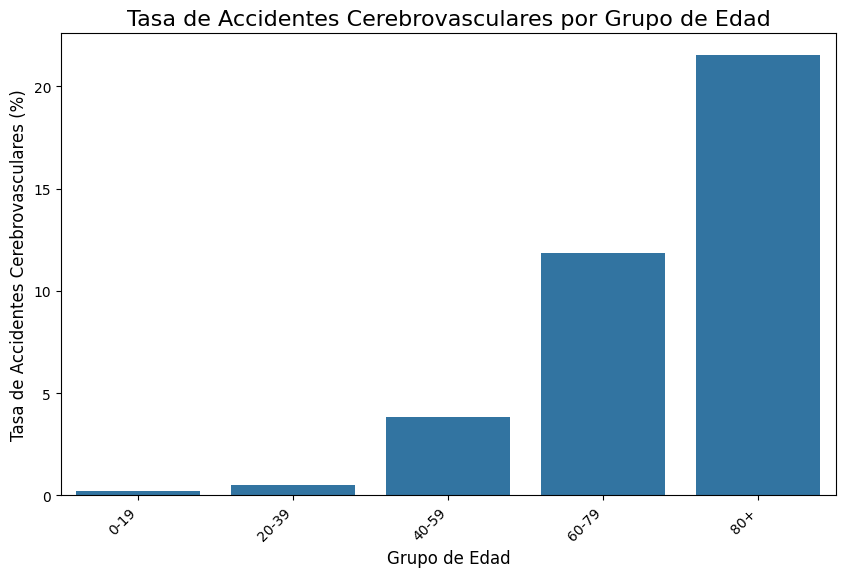

In [163]:

# Agrupar por rangos de edad y calcular la tasa de accidentes cerebrovasculares
bins = [0, 20, 40, 60, 80, 100]  # Define los rangos de edad
labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

stroke_rates = df.groupby('Grupo_Edad')['Derrame Cerebral'].agg(['sum', 'count'])
stroke_rates['Tasa'] = (stroke_rates['sum'] / stroke_rates['count']) * 100

print("\nTasas de accidente cerebrovascular por grupo de edad:")
print(stroke_rates)


# Visualizar las tasas
plt.figure(figsize=(10, 6))
sns.barplot(x=stroke_rates.index, y=stroke_rates['Tasa'])
plt.title('Tasa de Accidentes Cerebrovasculares por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Tasa de Accidentes Cerebrovasculares (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes por encima de la edad media tienen una incidencia de accidente cerebrovascular significativamente mayor en comparación con los que tienen una edad inferior.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2.Hipotesis IMC y Riesgo de Accidente Cerebrovascular. </div>

In [164]:




# Cuenta la cantidad de pacientes con IMC mayor a la media que sufrieron un accidente cerebrovascular
contador_imc_alto_derrame = len(df[(df['Indice de Masa Corporal'] > media_imc) & (df['Derrame Cerebral'] == 1)])

# Cuenta la cantidad total de pacientes con IMC mayor a la media
contador_imc_alto_total = len(df[df['Indice de Masa Corporal'] > media_imc])

# Calcula el porcentaje de pacientes con IMC alto que sufrieron un derrame
porcentaje_derrame_imc_alto = (contador_imc_alto_derrame / contador_imc_alto_total) * 100 if contador_imc_alto_total > 0 else 0

print(f"Hay {contador_imc_alto_derrame} pacientes con un IMC superior a la media ({media_imc:.2f}) que sufrieron un accidente cerebrovascular.")
print(f"De los {contador_imc_alto_total} pacientes con IMC superior a la media, el {porcentaje_derrame_imc_alto:.2f}% sufrió un accidente cerebrovascular.")

# Puedes repetir el proceso para los pacientes con un IMC menor o igual a la media para comparar
contador_imc_bajo_derrame = len(df[(df['Indice de Masa Corporal'] <= media_imc) & (df['Derrame Cerebral'] == 1)])
contador_imc_bajo_total = len(df[df['Indice de Masa Corporal'] <= media_imc])
porcentaje_derrame_imc_bajo = (contador_imc_bajo_derrame / contador_imc_bajo_total) * 100 if contador_imc_bajo_total > 0 else 0

print(f"Hay {contador_imc_bajo_derrame} pacientes con un IMC menor o igual a la media ({media_imc:.2f}) que sufrieron un accidente cerebrovascular.")
print(f"De los {contador_imc_bajo_total} pacientes con IMC menor o igual a la media, el {porcentaje_derrame_imc_bajo:.2f}% sufrió un accidente cerebrovascular.")

Hay 113 pacientes con un IMC superior a la media (28.86) que sufrieron un accidente cerebrovascular.
De los 2212 pacientes con IMC superior a la media, el 5.11% sufrió un accidente cerebrovascular.
Hay 136 pacientes con un IMC menor o igual a la media (28.86) que sufrieron un accidente cerebrovascular.
De los 2898 pacientes con IMC menor o igual a la media, el 4.69% sufrió un accidente cerebrovascular.


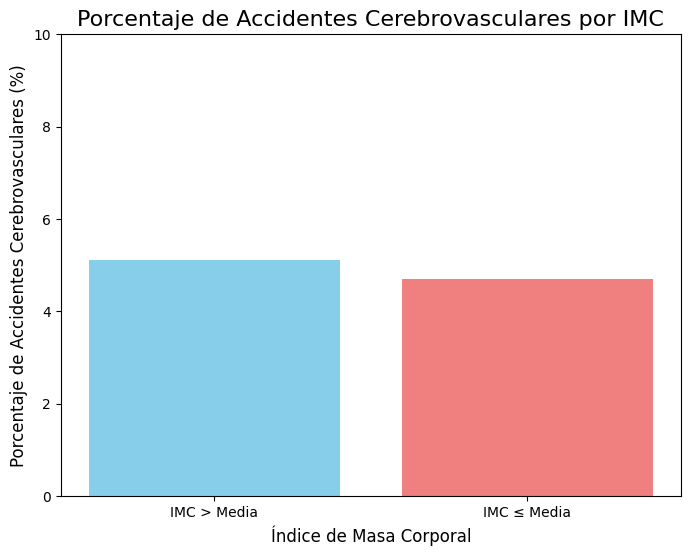

In [165]:
# prompt: generame un grafico  que muestre los pacientes con IMC superior a la media y su porcentaje de tener un accidente cerebrovascular en españoL

# Calcula el porcentaje de pacientes con IMC superior a la media que sufrieron un derrame
porcentaje_derrame_imc_alto = (contador_imc_alto_derrame / contador_imc_alto_total) * 100 if contador_imc_alto_total > 0 else 0

# Crea el gráfico
plt.figure(figsize=(8, 6))
plt.bar(['IMC > Media', 'IMC ≤ Media'], [porcentaje_derrame_imc_alto, porcentaje_derrame_imc_bajo], color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Accidentes Cerebrovasculares por IMC', fontsize=16)
plt.ylabel('Porcentaje de Accidentes Cerebrovasculares (%)', fontsize=12)
plt.xlabel('Índice de Masa Corporal', fontsize=12)
plt.ylim(0, 10) # Ajusta el rango del eje y
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Variables mas relacionadas❓</b></div>

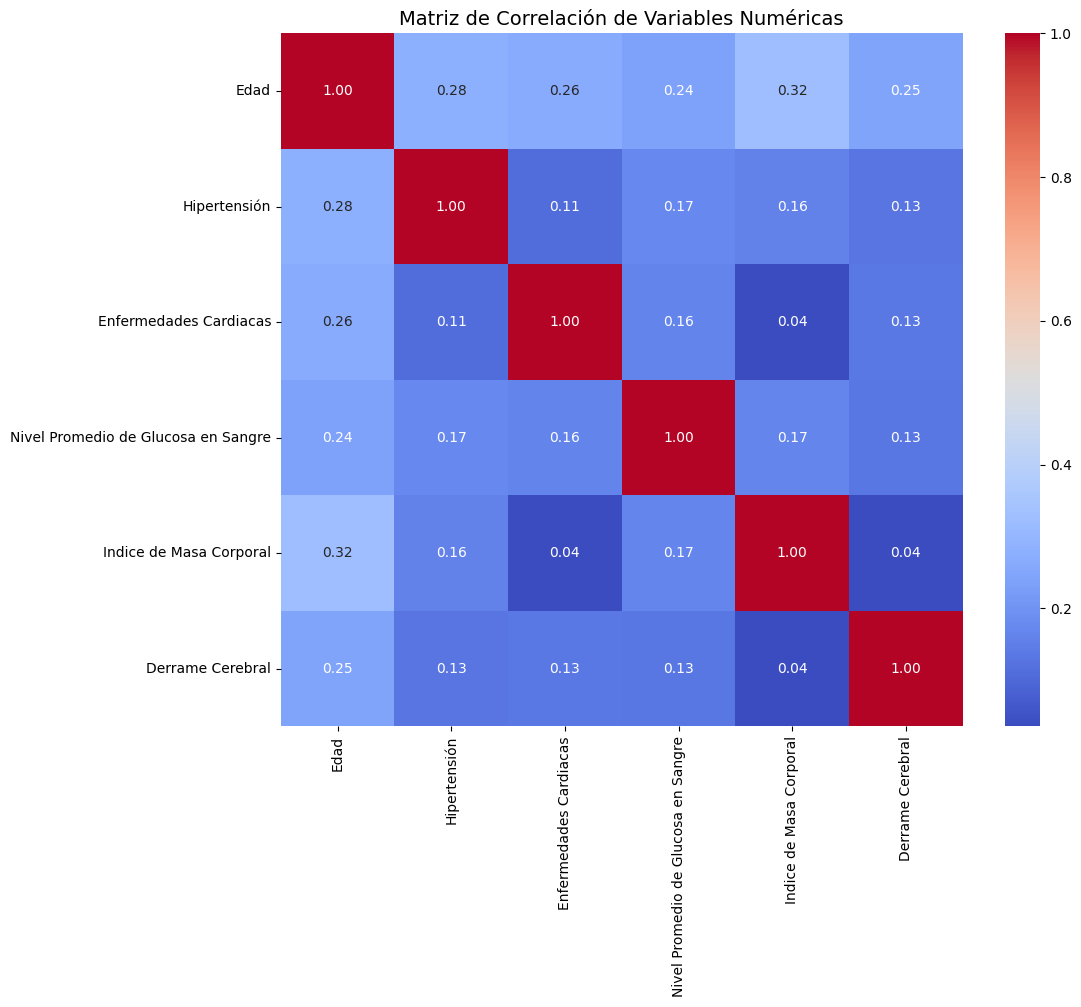

In [113]:
# prompt: GENERAME UN GRAFICO DE CORRELACCION CON LAS VARIABLES NUMERICAS (NO AGREGUES GENERO Y ESTADO FUMADDOR) en esppañol y acomoda el grafico para que se vea bien

# Suponiendo que 'df' es tu DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas numéricas, excluyendo 'Género' y 'Estado de Fumador'
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['Género', 'Estado de Fumador'], errors='ignore')

# Crea la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crea el mapa de calor de la correlación
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.show()

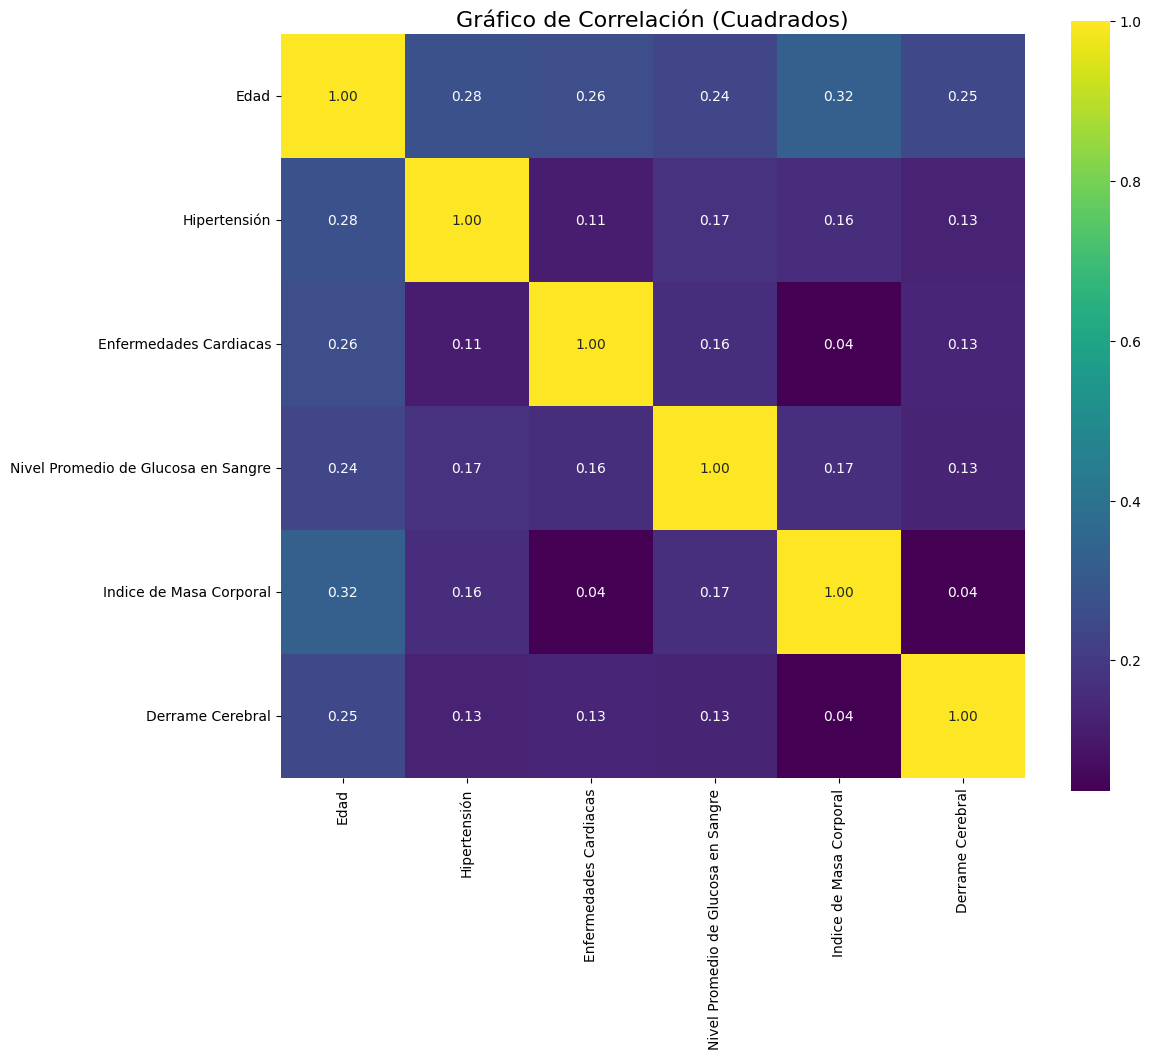

In [114]:
# prompt: GENERAME UN GRAFICO DE CORRELACCION en modo de cuadrados CON LAS VARIABLES NUMERICAS (NO AGREGUES GENERO Y ESTADO FUMADDOR) en esppañol

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecciona solo las columnas numéricas, excluyendo 'Género' y 'Estado de Fumador'
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['Género', 'Estado de Fumador'], errors='ignore')

# Crea la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crea el gráfico de correlación en modo de cuadrados
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True, fmt=".2f") # Usar square=True para cuadrados
plt.title('Gráfico de Correlación (Cuadrados)', fontsize=16)
plt.show()

<Figure size 1000x800 with 0 Axes>

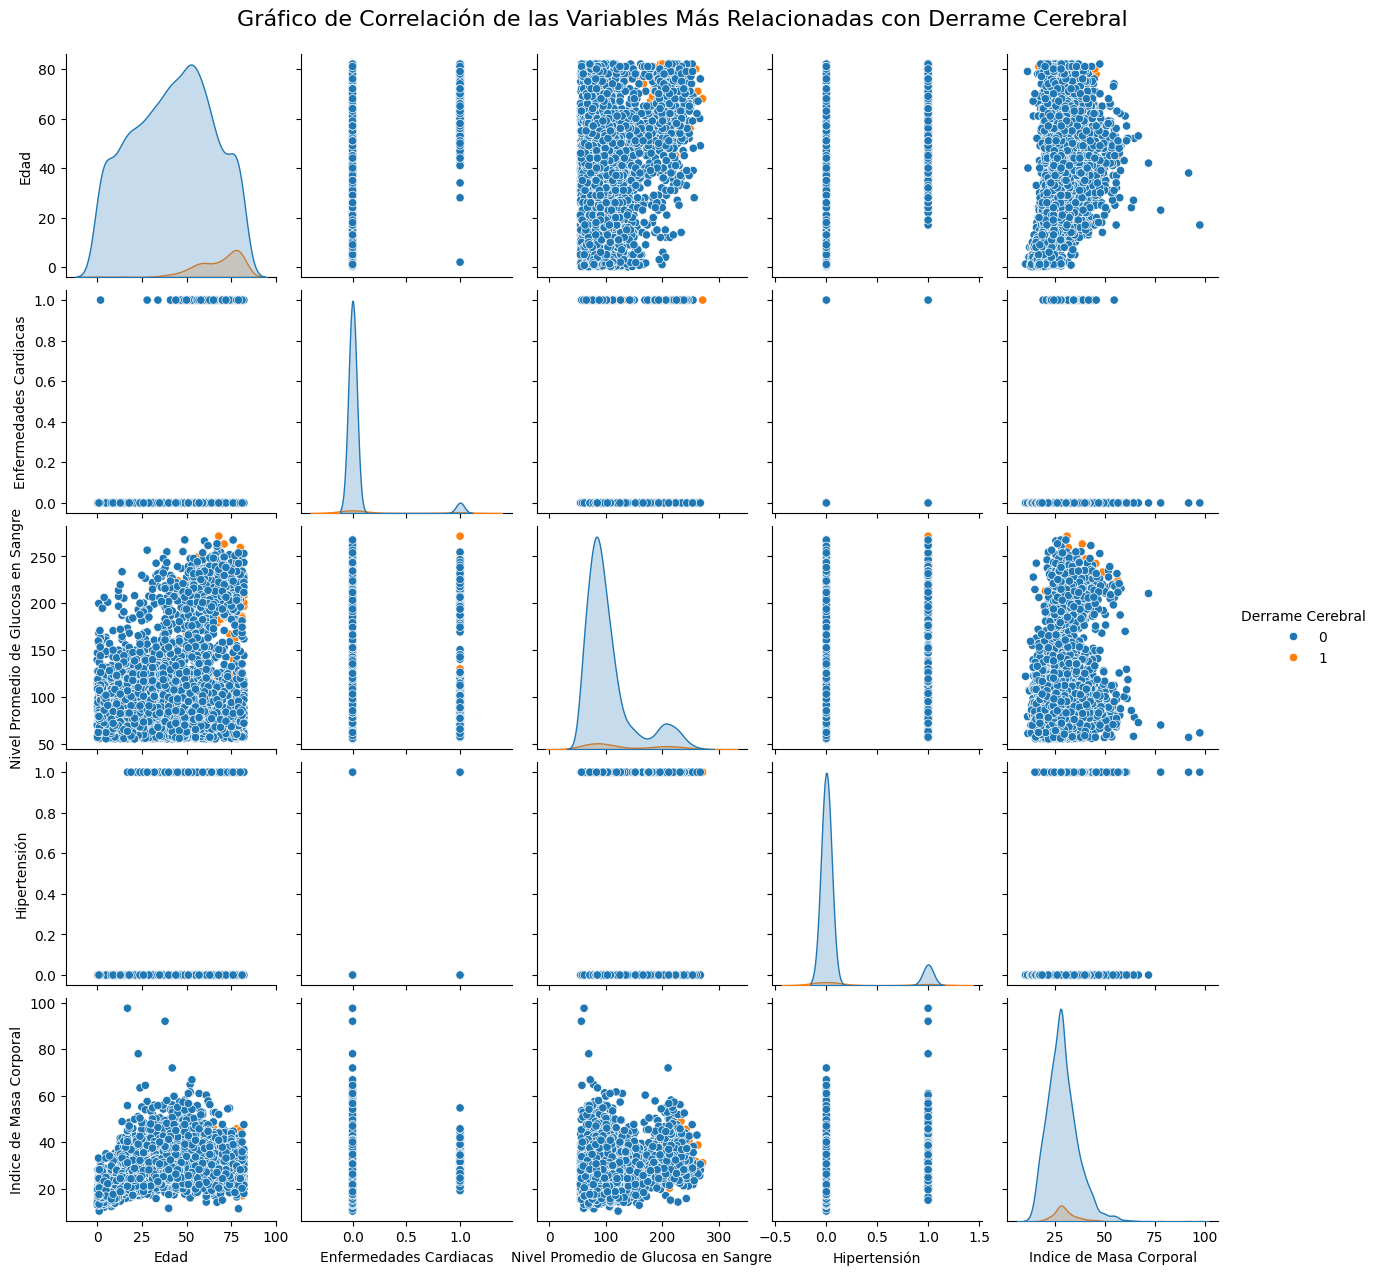

In [115]:
# prompt: GENERAME UN GRAFICO DE CORRELACCION SOLO CON LAS VARIABLES NUMERICAS MAS RELACIONADAS (NO AGREGUES GENERO Y ESTADO FUMADDOR) en esppañol

import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'df' y 'numeric_cols' ya están definidos como en el código anterior

# Encuentra las variables más correlacionadas con 'Derrame Cerebral'
correlation_with_stroke = correlation_matrix['Derrame Cerebral'].abs().sort_values(ascending=False)

# Selecciona las 5 variables más correlacionadas (excluyendo 'Derrame Cerebral' en sí mismo)
top_correlated_vars = correlation_with_stroke[1:6].index

# Crea un nuevo DataFrame con solo las variables seleccionadas y 'Derrame Cerebral'
df_top_corr = df[top_correlated_vars.tolist() + ['Derrame Cerebral']]

# Crea el gráfico de correlación para las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.pairplot(df_top_corr, hue='Derrame Cerebral', diag_kind='kde')
plt.suptitle('Gráfico de Correlación de las Variables Más Relacionadas con Derrame Cerebral', y=1.02, fontsize=16)
plt.show()

In [116]:
# prompt: GENERAME pointbiserialr Y PVALUE DE TODAS MIS VARIABLES NUMERICAS EN ESPAÑOL Y DDECIME SI SON BUENAS O NO

from scipy.stats import pointbiserialr
import pandas as pd

# Asegúrate de que 'df' esté definido y contenga tus datos
# Reemplaza 'df' con el nombre real de tu DataFrame

# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number)

# Itera sobre las columnas numéricas y calcula pointbiserialr
for col in numeric_cols.columns:
  if col != 'Derrame Cerebral': # Excluye la variable objetivo
    correlation, p_value = pointbiserialr(df[col], df['Derrame Cerebral'])
    print(f"Variable: {col}")
    print(f"Coeficiente de correlación point-biserial: {correlation:.3f}")
    print(f"Valor p: {p_value:.3f}")
    if p_value < 0.05:
      print(f"La correlación entre {col} y Derrame Cerebral es estadísticamente significativa.")
    else:
      print(f"La correlación entre {col} y Derrame Cerebral no es estadísticamente significativa.")
    print("-" * 20)

Variable: Edad
Coeficiente de correlación point-biserial: 0.245
Valor p: 0.000
La correlación entre Edad y Derrame Cerebral es estadísticamente significativa.
--------------------
Variable: Hipertensión
Coeficiente de correlación point-biserial: 0.128
Valor p: 0.000
La correlación entre Hipertensión y Derrame Cerebral es estadísticamente significativa.
--------------------
Variable: Enfermedades Cardiacas
Coeficiente de correlación point-biserial: 0.135
Valor p: 0.000
La correlación entre Enfermedades Cardiacas y Derrame Cerebral es estadísticamente significativa.
--------------------
Variable: Nivel Promedio de Glucosa en Sangre
Coeficiente de correlación point-biserial: 0.132
Valor p: 0.000
La correlación entre Nivel Promedio de Glucosa en Sangre y Derrame Cerebral es estadísticamente significativa.
--------------------
Variable: Indice de Masa Corporal
Coeficiente de correlación point-biserial: 0.036
Valor p: 0.010
La correlación entre Indice de Masa Corporal y Derrame Cerebral es e

TEST

In [166]:
# prompt: REALIIZA LOS TEST NECESARIOS CON MIS DATOS

# Assuming 'df' is your DataFrame.  Replace with your actual DataFrame name if different.

# Example tests for the code you provided.  Adapt these to your specific needs.

# Test 1: Check the data types of key columns
print("Data types of key columns:")
print(df[['Edad', 'Indice de Masa Corporal', 'Derrame Cerebral']].dtypes)


# Test 2: Verify the mean values.
print("\nVerification of mean values:")
print(f"Mean IMC: {df['Indice de Masa Corporal'].mean():.2f}")
print(f"Mean Age: {df['Edad'].mean():.2f}")

# Test 3: Check counts for categories
print("\nCounts for categories:")
print(df['Genero'].value_counts())
print(df['Estado de Fumador'].value_counts())

#Test 4: Check for null values
print("\nNull values per column:")
print(df.isnull().sum())

# Test 5: Check the range of values
print("\nRange of values for numerical columns")
for col in df.select_dtypes(include=np.number).columns:
  print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}")


#Test 6: Check for unexpected values in categorical features
print("\nUnique values for categorical columns")
for col in df.select_dtypes(include=object).columns:
  print(f"{col}: {df[col].unique()}")

# Add more tests as needed to cover other aspects of your data and analysis.

# Example: Check for outliers in 'Indice de Masa Corporal' using IQR
Q1 = df['Indice de Masa Corporal'].quantile(0.25)
Q3 = df['Indice de Masa Corporal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Indice de Masa Corporal'] < lower_bound) | (df['Indice de Masa Corporal'] > upper_bound)]
print(f"\nNumber of outliers in 'Indice de Masa Corporal': {len(outliers)}")


Data types of key columns:
Edad                       float64
Indice de Masa Corporal    float64
Derrame Cerebral             int64
dtype: object

Verification of mean values:
Mean IMC: 28.86
Mean Age: 43.23

Counts for categories:
Genero
Femenino     2994
Masculino    2115
Otro            1
Name: count, dtype: int64
Estado de Fumador
Nunca fumó               1892
Desconocido              1544
Anteriormente fumador     885
Fumador                   789
Name: count, dtype: int64

Null values per column:
Genero                                 0
Edad                                   0
Hipertensión                           0
Enfermedades Cardiacas                 0
Nivel Promedio de Glucosa en Sangre    0
Indice de Masa Corporal                0
Estado de Fumador                      0
Derrame Cerebral                       0
Grupo_Edad                             0
dtype: int64

Range of values for numerical columns
Edad - Min: 0.08, Max: 82.0
Hipertensión - Min: 0, Max: 1
Enfermedades 

# **Graficos Genero**

In [ ]:
# prompt: dame varias hipotesis

Here are several hypotheses based on the provided code and analysis:

**Regarding Stroke Prediction:**

1. **Age and Stroke Risk:**  Older patients are more likely to experience a stroke.  The code shows the distribution of age;  a hypothesis could be that patients above the mean age have a significantly higher stroke incidence compared to those below.  Further analysis could include calculating stroke rates within specific age brackets.
2. **BMI and Stroke Risk:** Higher BMI is associated with an increased risk of stroke. The boxplot and distribution analysis of BMI could be used to test the hypothesis that patients with BMIs above a certain threshold (e.g., the mean or a clinically relevant cutoff) are at greater risk.
3. **Hypertension and Stroke:**  Hypertension is a major risk factor for stroke.  The hypothesis is that patients with hypertension have a significantly higher probability of experiencing a stroke compared to normotensive patients.  The countplot of the "Hipertensión" feature supports exploring this further.
4. **Average Glucose Levels and Stroke:** Elevated average glucose levels are linked to stroke risk.  The provided analysis shows the distribution and mean glucose level. A hypothesis could be that patients with average glucose levels above a specific value (e.g. the mean or a diabetic threshold) are at greater risk of stroke.
5. **Heart Disease and Stroke:**  The presence of heart disease increases the risk of stroke. The hypothesis is that patients with heart disease have a higher stroke incidence compared to those without.
6. **Smoking Status and Stroke Risk:**  Smoking is a well-established risk factor.  The analysis shows the smoking status distribution. The hypothesis could be that current smokers or former smokers have a greater likelihood of stroke than those who never smoked.
7. **Gender and Stroke Risk:** There might be a difference in stroke risk between genders.  While the code shows the gender distribution, further investigation could test if females or males have a significantly higher stroke rate.  Additional analysis might consider interaction effects with other risk factors.


**Regarding Data Quality and Preprocessing:**

8. **Outlier Impact:** Outliers in the numeric features might be affecting the model's performance.  The boxplots suggest the presence of outliers; a hypothesis to test would be if removing or transforming these outliers improves model accuracy or robustness.

**Regarding Further Investigation:**

9. **Interactions between risk factors:** The individual risk factors may interact with each other. For example, the effect of hypertension on stroke risk may be amplified in older patients or those with high BMI. The analysis could explore these interactions.
10. **Unknown Smoking Status:** A large number of patients have unknown smoking status. A hypothesis could be that this missing information biases the model's predictions, and imputation strategies might improve results. This could also lead to the hypothesis that those with unknown status may present a different health profile and different risk for stroke.

Remember that these are just hypotheses.  Statistical testing is needed to determine if these hypotheses are supported by the data.


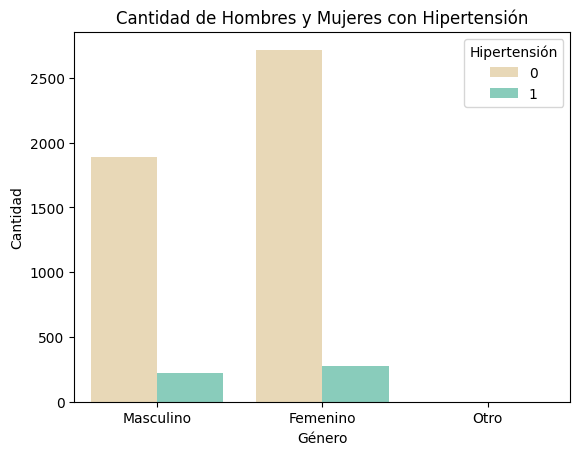

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Hipertensión
sns.countplot(x='Genero', hue='Hipertensión', data=df)
plt.title('Cantidad de Hombres y Mujeres con Hipertensión')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Hipertensión**

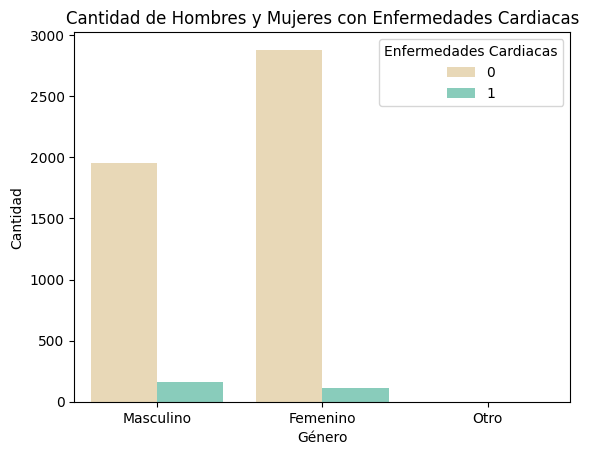

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Enfermedades Cardiacas
sns.countplot(x='Genero', hue='Enfermedades Cardiacas', data=df)
plt.title('Cantidad de Hombres y Mujeres con Enfermedades Cardiacas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Enfermedades Cardiacas**

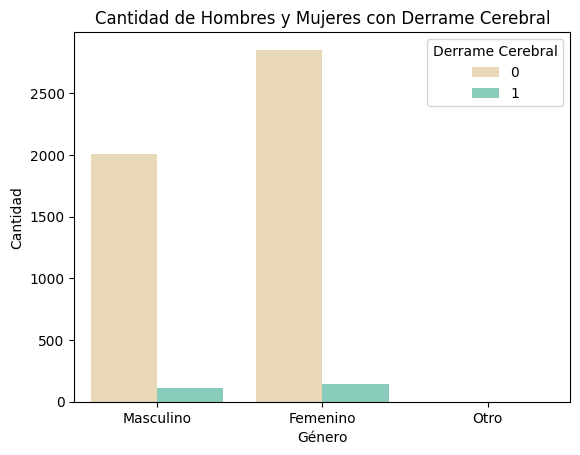

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Derrames Cerebrales
sns.countplot(x='Genero', hue='Derrame Cerebral', data=df)
plt.title('Cantidad de Hombres y Mujeres con Derrame Cerebral')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Derrames Cerebrales**

# **Hipótesis Graficos por Estado de Fumador y Género**

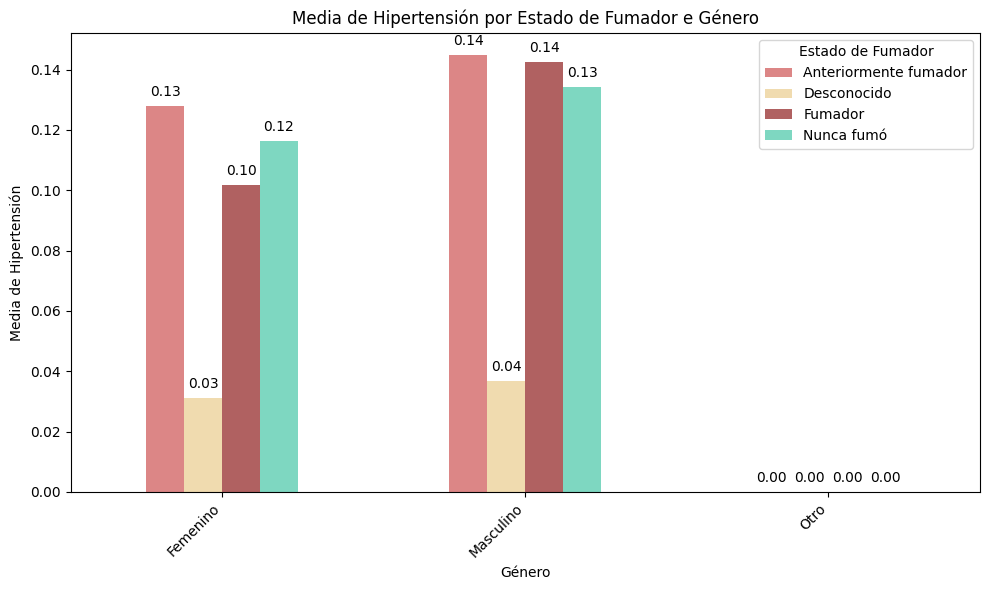

In [ ]:
#PLT

# Se agrupo por estado de fumador y género, y calcula la media de hipertensión
grouped = df.groupby(['Genero', 'Estado de Fumador'])['Hipertensión'].mean().unstack()

# Se creo el gráfico de barras
colors = {'Anteriormente fumador': '#DC8686', 'Fumador': '#B06161', "Nunca fumó" : "#7ED7C1", "Desconocido" : "#F0DBAF" }
ax = grouped.plot(kind='bar', figsize=(10, 6), color=[colors.get(col, 'gray') for col in grouped.columns])
plt.title('Media de Hipertensión por Estado de Fumador e Género')
plt.xlabel('Género')
plt.ylabel('Media de Hipertensión')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado de Fumador')
plt.tight_layout()

#Se agrego las etiquetas de datos para un mejor conprension
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'),
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (0, 10),
              textcoords = 'offset points')

plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener hipertension**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_hipertension = fumadores[['Estado de Fumador', 'Genero', 'Hipertensión"']]

# Muestro la tabla
tabla_fumadores_hipertension

,Estado de Fumador,Genero,"Hipertensión"""
0,Anteriormente fumador,Masculino,0
3,Fumador,Femenino,0
5,Anteriormente fumador,Masculino,0
11,Fumador,Femenino,0
12,Fumador,Femenino,0
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,1
5099,Fumador,Masculino,0



**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen hipertension. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**



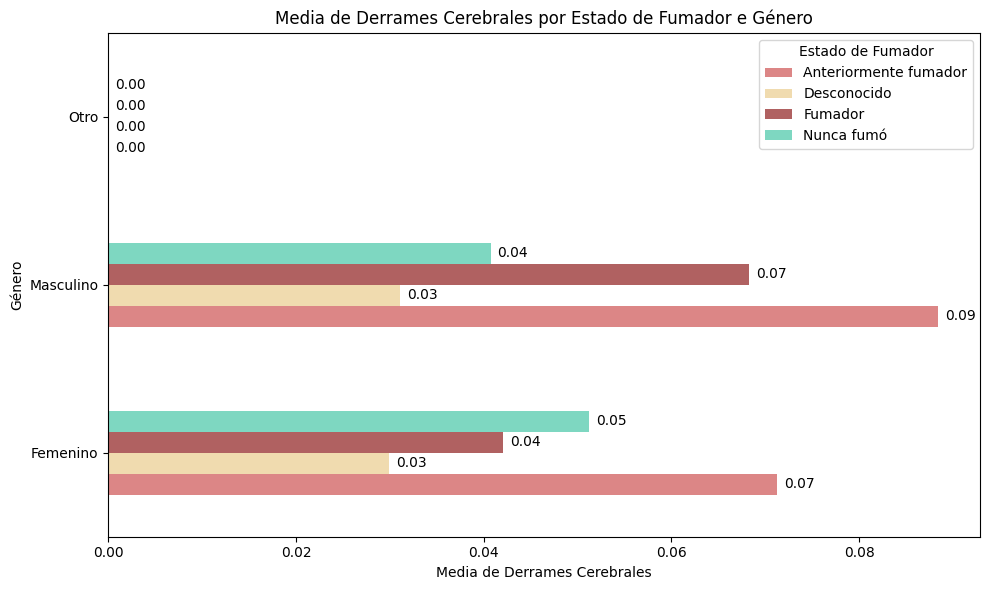

In [ ]:

# Se agrupo por género y estado de fumador, y calcula la media de derrames cerebrales
grouped = df.groupby(['Genero', 'Estado de Fumador'])['Derrame Cerebral'].mean().unstack()

# Se creo el gráfico de barras con los colores especificados
colors = {'Anteriormente fumador': '#DC8686', 'Fumador': '#B06161', "Nunca fumó" : "#7ED7C1", "Desconocido" : "#F0DBAF" }
ax = grouped.plot(kind='barh', figsize=(10, 6), color=[colors.get(col, 'gray') for col in grouped.columns])
plt.title('Media de Derrames Cerebrales por Estado de Fumador e Género')
plt.ylabel('Género')
plt.xlabel('Media de Derrames Cerebrales')
plt.yticks(rotation=0)
plt.legend(title='Estado de Fumador')
plt.tight_layout()

# Se agrego etiquetas de datos para mejor comprensión
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points')

plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener Derrames Cerebrales**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_derrame_cerebral = fumadores[['Estado de Fumador', 'Genero', 'Derrame Cerebral']]

# Muestro la tabla
tabla_fumadores_derrame_cerebral

,Estado de Fumador,Genero,Derrame Cerebral
0,Anteriormente fumador,Masculino,1
3,Fumador,Femenino,1
5,Anteriormente fumador,Masculino,1
11,Fumador,Femenino,1
12,Fumador,Femenino,1
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,0
5099,Fumador,Masculino,0


**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen derrames cerebrales. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

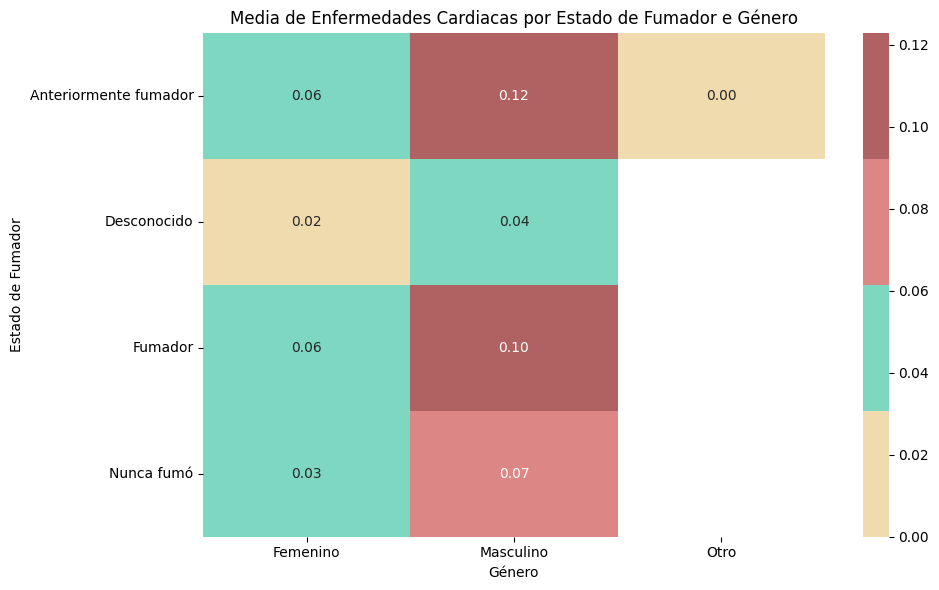

In [ ]:
#SNS

# Se agrupo por género e hipertensión, y calcula la media de enfermedades cardiacas
grouped = df.groupby(['Estado de Fumador', 'Genero'])['Enfermedades Cardiacas'].mean().unstack()

# Se creo el mapa de calor
plt.figure(figsize=(10, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.heatmap(grouped, annot=True, cmap=colors, fmt='.2f')
plt.title('Media de Enfermedades Cardiacas por Estado de Fumador e Género')
plt.xlabel('Género')
plt.ylabel('Estado de Fumador')
plt.tight_layout()
plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener enfermedades cardiacas**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_cardiacas = fumadores[['Estado de Fumador', 'Genero', 'Enfermedades Cardiacas']]

# Muestro la tabla
tabla_fumadores_cardiacas

,Estado de Fumador,Genero,Enfermedades Cardiacas
0,Anteriormente fumador,Masculino,1
3,Fumador,Femenino,0
5,Anteriormente fumador,Masculino,0
11,Fumador,Femenino,1
12,Fumador,Femenino,0
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,0
5099,Fumador,Masculino,0


**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen enfermedades cardiacas. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

# **Hipótesis Graficos por BMI**

<ipython-input-29-5f7240a18648>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bmi_category')['Enfermedades Cardiacas'].mean().reset_index()
<ipython-input-29-5f7240a18648>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bmi_category', y='Enfermedades Cardiacas', data=grouped, palette=colors)


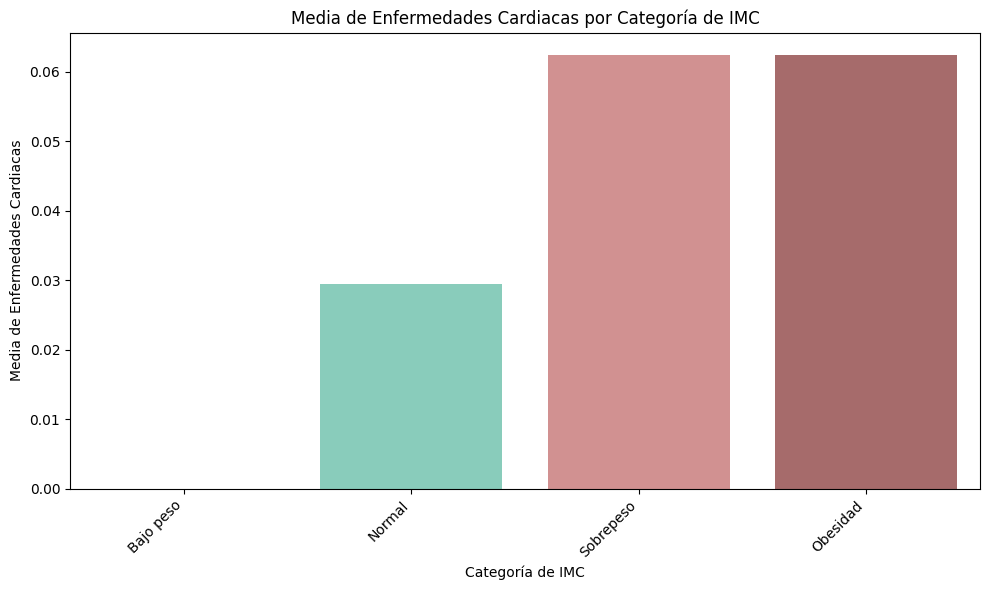

In [ ]:
#SNS

# Se calculo la media de enfermedades cardiacas por promedio de IMC
grouped = df.groupby('bmi_category')['Enfermedades Cardiacas'].mean().reset_index()

# Se creo el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.barplot(x='bmi_category', y='Enfermedades Cardiacas', data=grouped, palette=colors)
plt.xlabel('Categoría de IMC')
plt.ylabel('Media de Enfermedades Cardiacas')
plt.title('Media de Enfermedades Cardiacas por Categoría de IMC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para las Enfermedades Cardiacas**

In [ ]:

# Se selecciono las columnas deseadas
tabla_bmi_enfermedades_cardiacas = df[['Indice de Masa Corporal', 'Enfermedades Cardiacas']]

# Muestro la tabla
tabla_bmi_enfermedades_cardiacas

,Indice de Masa Corporal,Enfermedades Cardiacas
0,36.6,1
1,NaN,0
2,32.5,1
3,34.4,0
4,24.0,0
...,...,...
5105,NaN,0
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Enfermedades Cardiacas. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**


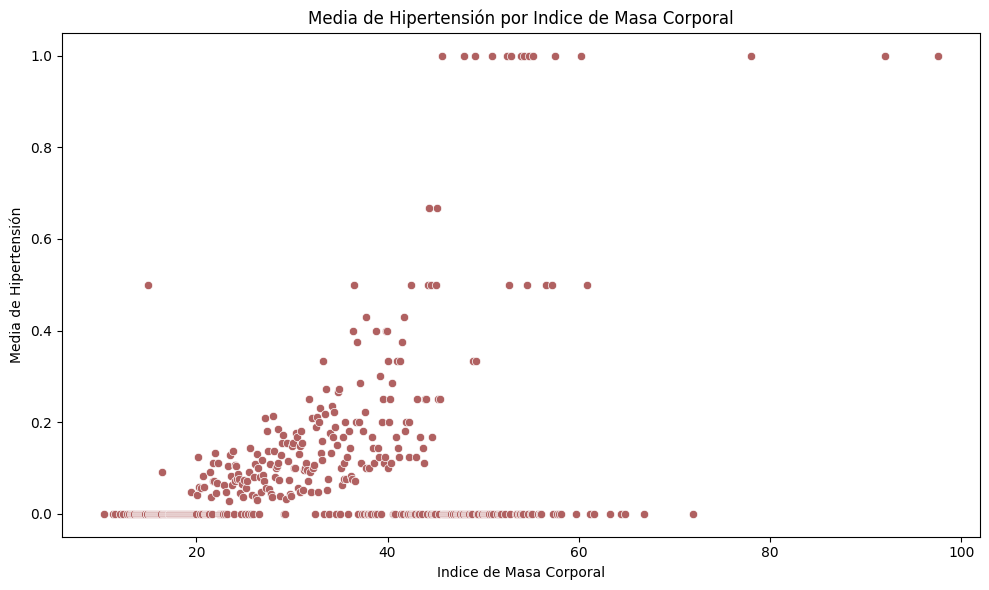

In [ ]:
#SNS
# Se calculo la media de hipertensión por promedio de IMC
grouped = df.groupby('Indice de Masa Corporal')['Hipertensión'].mean().reset_index()

# Se creo el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Indice de Masa Corporal', y='Hipertensión', data=grouped, color='#B06161')
plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Media de Hipertensión')
plt.title('Media de Hipertensión por Indice de Masa Corporal')
plt.tight_layout()
plt.show()


**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para la Hipertensión**

In [ ]:


# Se selecciono las columnas deseadas
tabla_bmi_hipertension = df[['Indice de Masa Corporal', 'Hipertensión']]

# Muestro la tabla
tabla_bmi_hipertension


,Indice de Masa Corporal,Hipertensión
0,36.6,0
1,NaN,0
2,32.5,0
3,34.4,0
4,24.0,1
...,...,...
5105,NaN,1
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Hipertensión. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**


<ipython-input-29-cb37502d8a68>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bmi_category')['Derrame Cerebral'].mean()


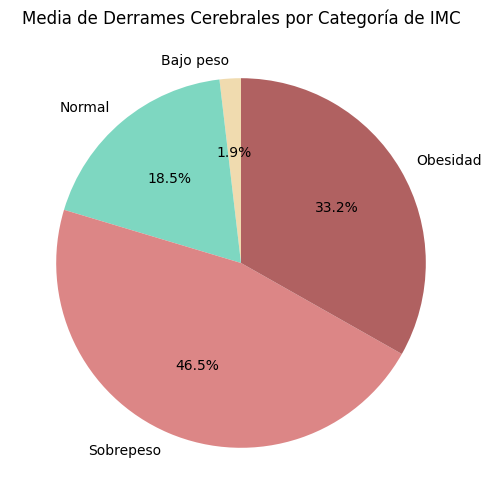

In [ ]:

# Se calculo la media de derrames cerebrales por categoría de IMC
df['bmi_category'] = pd.cut(df['Indice de Masa Corporal'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'])
grouped = df.groupby('bmi_category')['Derrame Cerebral'].mean()

# Se creo el gráfico de torta con Seaborn
plt.figure(figsize=(8, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.set_palette(sns.color_palette(colors))
plt.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Media de Derrames Cerebrales por Categoría de IMC')
plt.show()


**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para los Derrames Cerebrales**

In [ ]:


# Se selecciono las columnas deseadas
tabla_bmi_derrame_cerebral = df[['Indice de Masa Corporal', 'Derrame Cerebral']]

# Muestro la tabla
tabla_bmi_derrame_cerebral


,Indice de Masa Corporal,Derrame Cerebral
0,36.6,1
1,28.1,1
2,32.5,1
3,34.4,1
4,24.0,1
...,...,...
5105,28.1,0
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Derrames Cerebrales. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

# **En base a los resultados obtenidos en los graficos se pudo observar que**

**El haber sido fumador o ex fumador es un condicional para las diferentes enfermedades.**

**El tener obesidad o sobrepeso (IMC) es un condicional para las diferentes enfermedades.**

**El genero no deberia ser un condicional para las diferentes enfermedades.**

# **Modelado**

## **Label Encoder**

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Se creo un objeto LabelEncoder
le = LabelEncoder()

# Aplio LabelEncoder a las columnas categóricas
df['Genero'] = le.fit_transform(df['Genero'])
df['Estado de Fumador'] = le.fit_transform(df['Estado de Fumador'])
df.head(10)



,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
2,1,80.0,0,1,105.92,32.5,3,1
6,1,74.0,1,1,70.09,27.4,3,1
7,0,69.0,0,0,94.39,22.8,3,1
8,0,59.0,0,0,76.15,28.1,1,1
9,0,78.0,0,0,58.57,24.2,1,1
10,0,81.0,1,0,80.43,29.7,3,1
11,0,61.0,0,1,120.46,36.8,2,1
12,0,54.0,0,0,104.51,27.3,2,1
18,0,60.0,0,0,89.22,37.8,3,1
24,1,71.0,0,0,102.87,27.2,0,1


**La columna estado de Fumador fue reemplazada de la siguiente manera**
*  **Anterior Fumador** = 0
*   **Desconocido** = 1
*   **Nunca Fumo** = 3
*   **Fumador** = 2

**La columna genero fue reemplazada de la siguiente manera**
*   **Masculino** = 1
*   **Femenino** = 0





## **Modelo Logistic Regression**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9523809523809523
Matriz de Confusión:
 [[800   0]
 [ 40   0]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       800
           1       0.00      0.00      0.00        40

    accuracy                           0.95       840
   macro avg       0.48      0.50      0.49       840
weighted avg       0.91      0.95      0.93       840



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Logist Regression es:", r2)


El R2 de el modelo Logist Regression es: 0.06458333333333366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y) para las columnas numéricas
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Logistic Regression (MSE):", mse)


Error cuadrático medio Logistic Regression (MSE): 0.05176100206826707


## **Modelo Decision Tree**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.919047619047619
Matriz de Confusión:
 [[767  33]
 [ 35   5]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       800
           1       0.13      0.12      0.13        40

    accuracy                           0.92       840
   macro avg       0.54      0.54      0.54       840
weighted avg       0.92      0.92      0.92       840



In [ ]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Decision Tree es:", r2)


El R2 de el modelo Decision Tree es: 0.5281922043010758


In [ ]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Decision Tree (MSE):", mse)


Error cuadrático medio Decision Tree (MSE): 0.08708414872798434


## **Modelo Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9523809523809523
Matriz de Confusión:
 [[799   1]
 [ 39   1]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       800
           1       0.50      0.03      0.05        40

    accuracy                           0.95       840
   macro avg       0.73      0.51      0.51       840
weighted avg       0.93      0.95      0.93       840



In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R^2
r2 = r2_score(y_test, y_pred)
print("El R2 de el modelo Random Forest es:", r2)


El R2 de el modelo Random Forest es: 0.07170908938172005


In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']  # Reemplaza 'Derrame Cerebral' con el nombre de la columna numérica que quieres predecir

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Random Forest (MSE):", mse)


Error cuadrático medio Random Forest (MSE): 0.052898727984344425


## **Modelo XGBoost**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9523809523809523
Matriz de Confusión:
 [[796   4]
 [ 36   4]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       800
           1       0.50      0.10      0.17        40

    accuracy                           0.95       840
   macro avg       0.73      0.55      0.57       840
weighted avg       0.93      0.95      0.94       840



In [ ]:


# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo XGBoost es:", r2)


El R2 de el modelo XGBoost es: 0.0851142903999842


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio XGBoost (MSE):", mse)


Error cuadrático medio XGBoost (MSE): 0.06183532018164667


## **Conclusion Modelos**

**Los modelos que mejor se adaptan a mi Dataset son XGBoost y Random Forest. Sin embargo este no es bueno y se podria mejorar. Lo que considero que podria ayudar a mejorar este modelo es la inclusion de mayor cantidad de datos y ver si modificando los Outliers cambia.**


**Sin embargo podrian tratarse los datos de otra manera para intentar obtener un mejor resultado pero es poco probable lograr un resultado correcto de prediccio**n